In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [3]:
df.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [4]:
X = df[df.columns.drop('selling_price')]
Y= df['selling_price']

In [5]:
X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [6]:
Y.head()

0   -1.111046
1   -0.223944
2   -0.915058
3   -0.892365
4   -0.182683
Name: selling_price, dtype: float64

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [8]:
model.intercept_

4.212997028165825e-05

In [9]:
model.coef_

array([ 3.12714359e+10, -1.82380676e-02, -4.86831456e-02,  3.13901232e-02,
        2.73650325e-02,  3.12714359e+10,  6.07820879e-02,  7.94152064e-01,
       -1.69558910e-02, -3.47477964e-03,  1.40830690e-02,  1.27530900e-02,
        2.83112485e-03, -2.25858065e-02, -1.29335793e-02, -2.46436303e-02,
       -3.26560109e-02])

In [10]:
model.score(X,Y)

0.9421886951844269

In [11]:
print("Adjusted R-squared:", 1 - (1-model.score(X, Y)) * (len(Y)-1)/(len(Y)-X.shape[1]-1))

Adjusted R-squared: 0.9421390642288737


In [12]:
import statsmodels.api as sm

In [13]:
X_sm = sm.add_constant(X) #statsmodel default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(Y,X_sm).fit()

In [14]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.017e+04
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:58:28   Log-Likelihood:                 125.81
No. Observations:               19820   AIC:                            -217.6
Df Residuals:                   19803   BIC:                            -83.41
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.795e-16      0.002  

# VIF

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
vif = pd.DataFrame()
X_t = X
vif['features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\Users\suman\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,year,inf
5,age,inf
13,Petrol,17.94
10,Diesel,17.03
16,>5,13.32
15,5,12.08
3,engine,6.27
7,model,5.80
4,max_power,5.08
6,make,3.20


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=1)

In [20]:
print("Training set shape X: ",x_train.shape)
print("Training set shape Y: ",y_train.shape)
print("Test set shape X: ",x_test.shape)
print("Test set shape Y: ",y_test.shape)

Training set shape X:  (17838, 17)
Training set shape Y:  (17838,)
Test set shape X:  (1982, 17)
Test set shape Y:  (1982,)


In [21]:
final_model = LinearRegression()
final_model.fit(x_train,y_train)

LinearRegression()

In [22]:
final_model.score(x_train,y_train)

0.94143959807184

In [23]:
final_model.intercept_

-0.0008009841592582904

In [24]:
final_model.coef_

array([ 5.57405200e+09, -1.78880692e-02, -4.86736471e-02,  3.18692487e-02,
        2.75288145e-02,  5.57405200e+09,  5.90582500e-02,  7.93230218e-01,
       -1.72757134e-02, -3.19994585e-03,  1.46650840e-02,  1.28363643e-02,
        2.49289322e-03, -2.24262731e-02, -1.22066324e-02, -2.59055313e-02,
       -3.36659319e-02])

In [26]:
Y_pred = final_model.predict(x_test) #this will give prediction on test data set

In [27]:
# model performance
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error

In [31]:
print("Mean Absoulute Error: ",mean_absolute_error(Y_pred,y_test))
print("Mean Squarred Error: ",mean_squared_error(Y_pred,y_test))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_pred,y_test)))
print("Mean Absoulute Percentage Error: ",mean_absolute_percentage_error(Y_pred,y_test))

Mean Absoulute Error:  0.15719521834600986
Mean Squarred Error:  0.05399287428151572
Root Mean Squared Error:  0.23236366816160334
Mean Absoulute Percentage Error:  1.5037234651987834


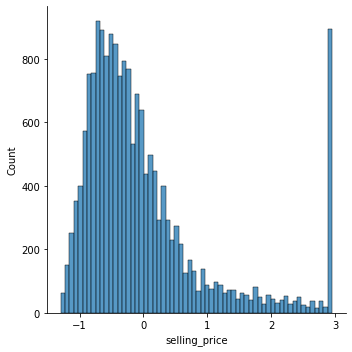

In [32]:
sns.displot(y_train)

# Residual Analysis

### Errors are Normally Distributed?

In [33]:
pred = final_model.predict(x_train)

In [34]:
errors = pred - y_train # residuals

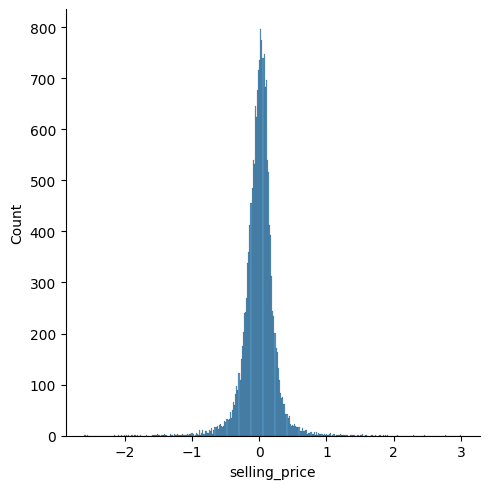

In [35]:
sns.displot(errors)

c:\Users\suman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'errors')

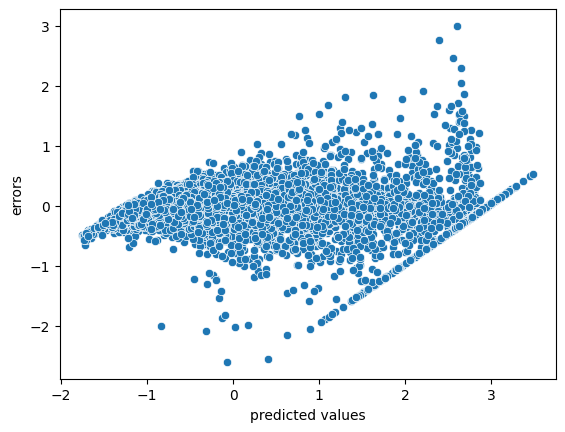

In [36]:
# Autocorrelation and Heteroscedasticity
## Plot (Predicted values vs Residual)

sns.scatterplot(pred,errors)
plt.xlabel('predicted values')
plt.ylabel('errors')